## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df[df['converted'] == 1]['user_id'].nunique()

35173

In [6]:
(35173 / 290584) * 100

12.104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.query('group == "treatment" & landing_page == "old_page"').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [8]:
df.query('group == "control" & landing_page == "new_page"').count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [9]:
1928 + 1965

3893

f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df2.drop(df2.query('group == "treatment" & landing_page == "old_page"').index,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292513 entries, 0 to 294477
Data columns (total 5 columns):
user_id         292513 non-null int64
timestamp       292513 non-null object
group           292513 non-null object
landing_page    292513 non-null object
converted       292513 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.4+ MB


In [13]:
df2.drop(df2.query('group == "control" & landing_page == "new_page"').index,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2['user_id'].duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
          ...  
294448    False
294449    False
294450    False
294451    False
294452    False
294453    False
294454    False
294455    False
294456    False
294457    False
294458    False
294459    False
294460    False
294461    False
294462    False
294463    False
294464    False
294465    False
294466    False
294467    False
294468    False
294469    False
294470    False
294471    False
294472    False
294473    False
294474    False
294475    False
294476    False
294477    False
Name: user_id, Length: 2

c. What is the row information for the repeat **user_id**? 

In [18]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.drop([2893] , inplace=True)

In [20]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [22]:
(df2['converted']==1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [67]:
#cont_conv = df2[df2['group'] == 'control']['converted'].mean()
cont_conv = df2.query('group == "control"').converted.mean()
cont_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [68]:
#treat_conv = df2[df2['group'] == 'treatment']['converted'].mean()
treat_conv = df2.query('group == "treatment"').converted.mean()
treat_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [69]:
(df2['landing_page']=='new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**

The Evidence so far stats that control convertion rate is more than treatment conversion rate, but the difference is very small so we can't give a judment here on which page is better as we don't have enough statistical evidence that's why hypothesis testing is needed.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

**$H_{o}$**: **$p_{old}$** >= **$p_{new}$** 

**$H_{1}$**: **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [70]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [71]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [72]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [73]:
n_new=df2.query('group == "treatment"').group.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [74]:
n_old=df2.query('group == "control"').group.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [75]:
new_page_converted = np.random.choice([0,1] , size=n_new, p=[1-p_new,p_new])
new_page_converted

array([1, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [76]:
old_page_converted = np.random.choice([0,1] , size=n_old, p=[1-p_old,p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [82]:
#difference = new_page_converted.mean() - old_page_converted.mean()
cont_conv = df2.query('group == "control"').converted.mean()
treat_conv =  df2.query('group == "treatment"').converted.mean()
difference = treat_conv - cont_conv
difference

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [79]:
p_diffs = []
new_page_converted = np.random.binomial(n_new, p_new,10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old,10000)/n_old
p_diffs = new_page_converted - old_page_converted
p_diffs.mean()



#for i in range(10000):
    #new_page_converted = np.random.choice([0,1] , size=n_new, p=[1-p_new,p_new])
    #old_page_converted = np.random.choice([0,1] , size=n_old, p=[1-p_old,p_old])
    #p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

-6.4360520255039186e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   31.,   154.,   702.,  1833.,  2897.,  2606.,  1299.,   407.,
           64.,     7.]),
 array([-0.00433127, -0.00342827, -0.00252527, -0.00162227, -0.00071928,
         0.00018372,  0.00108672,  0.00198971,  0.00289271,  0.00379571,
         0.00469871]),
 <a list of 10 Patch objects>)

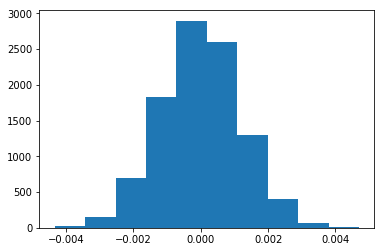

In [80]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [83]:
diff_prop = (p_diffs > difference).mean()
diff_prop

0.90439999999999998

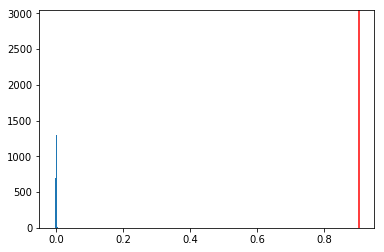

In [84]:
plt.hist(p_diffs)
plt.axvline(x=diff_prop, color = 'red')

**Answer**

This is called the **P-Value** and when it's high like this we fail to reject the null hypothesis $H_{o}$

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [85]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [86]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1').converted.count()
convert_new = df2.query('group == "treatment" & converted == 1').converted.count()
n_old = df2.query('landing_page == "old_page"').landing_page.count()
n_new = df2.query('landing_page == "new_page"').landing_page.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [87]:
sm.stats.proportions_ztest([convert_new,convert_old], [n_old,n_new], alternative='larger')

(-1.2616957421858055, 0.89647085519672265)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

The P-value here is very close to the one computed above and the Z-score also support our P-Value that here we fail to reject our null hypotheses $H_{o}$

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**ANSWER**

We should use **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [88]:
ab_page = (df2.group == 'treatment')
df2['ab_page'] = ab_page

In [89]:
df2.ab_page.replace(False, 0, inplace=True)

In [90]:
df2['intercept'] = 1

In [91]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0.0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0.0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1.0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1.0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0.0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [92]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [93]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        11:32:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**

The **P-Value** here is: 0.190

The values are different but close beacuse in partII we had our random sample generated 10K times so their is higher probability of overlapping.

Also, the p-value obtained in the previous question corresponds to a one-tailed test. while the test implied by the regression model is a two tailed test.

This is because a high p-value for ab_page in the regression model means that there is no correlation between the landing page type and the conversion rate. This implies that p_new is equal to p_old. which is the null hypothesis of a two tailed test:

Ho: p_new = p_old
H1: p_new != p_old

The z-test in part II on the other hand is one-tailed since it has inequality signs in the hypotheses.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

Adding more factors will change my regression model as I will use another technique to get my answers, other feautres like age, gender and time may enhance our model but will add more complexity in the implementation.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [107]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [108]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0.0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0.0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1.0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1.0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0.0,1


In [109]:
df_new = df2.set_index('user_id').join(countries.set_index('user_id'), how='inner')
df_new.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0.0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,0.0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1.0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1.0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,0.0,1,US


In [110]:
df_new.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [111]:
#create new colomns on these new countries
df_new[['UK','US']] = pd.get_dummies(df_new['country'])[['UK','US']]
df_new.head(10)

,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0.0,1,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,0.0,1,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1.0,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1.0,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,0.0,1,US,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0,0.0,1,US,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1.0,1,CA,0,0
719014,2017-01-17 01:48:29.539573,control,old_page,0,0.0,1,US,0,1
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1.0,1,UK,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [112]:
#fit converted <- each country

#UK 
df_new['UK_ab_page'] = df_new['ab_page']*df_new['UK']

model = sm.Logit(df_new['converted'], df_new[['ab_page', 'UK_ab_page','UK','intercept']])
results2 = model.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:               2.036e-05
Time:                        11:41:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0236      0.013     -1.788      0.074      -0.050       0.002
UK_ab_page     0.0345      0.026      1.307      0.191      -0.017       0.086
UK            -0.0046      0.019     -0.247      0.805      -0.041       0.032
intercept     -1.9876      0.009   -213.551      0.000      -2.006      -1.969
==============================================================================
"""

**Practical Conclusion**

Practical wise it's not right to invest in the new page as it doesn't increase the convertion rate in a severe way.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [113]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0